# Stock Analysis Predicter

In [1]:
# importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 
  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from xgboost import XGBClassifier 
from sklearn import metrics 
  
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_abc = pd.read_csv('abc.us.txt', sep=',', header=0) 
df_cah = pd.read_csv('cah.us.txt', sep=',', header=0) 
df_ci = pd.read_csv('ci.us.txt', sep=',', header=0) 

df_cah.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1988-01-04,0.6326,0.6326,0.6326,0.6326,40783,0
1,1988-01-05,0.6500,0.6500,0.6500,0.6500,177705,0
2,1988-01-06,0.6500,0.6758,0.6326,0.6758,110703,0
3,1988-01-07,0.6758,0.6931,0.6584,0.6931,91766,0
4,1988-01-08,0.7105,0.7366,0.7105,0.7105,152938,0


In [4]:
df_cah.describe()

,Open,High,Low,Close,Volume,OpenInt
count,7519.000000,7519.000000,7519.000000,7519.000000,7.519000e+03,7519.0
mean,30.504454,30.814893,30.190844,30.515500,2.408790e+06,0.0
std,22.411370,22.591828,22.227489,22.412914,2.237742e+06,0.0
min,0.632600,0.632600,0.632600,0.632600,0.000000e+00,0.0
25%,8.864900,8.943350,8.812900,8.864900,9.480990e+05,0.0
50%,30.929000,31.267000,30.600000,30.964000,2.087578e+06,0.0
75%,41.012000,41.389000,40.550000,41.020000,3.220812e+06,0.0
max,86.843000,87.195000,86.626000,86.911000,5.715987e+07,0.0


In [5]:
df_cah.shape

(7519, 7)

In [6]:
df_cah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7519 entries, 0 to 7518
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     7519 non-null   object 
 1   Open     7519 non-null   float64
 2   High     7519 non-null   float64
 3   Low      7519 non-null   float64
 4   Close    7519 non-null   float64
 5   Volume   7519 non-null   int64  
 6   OpenInt  7519 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 411.3+ KB


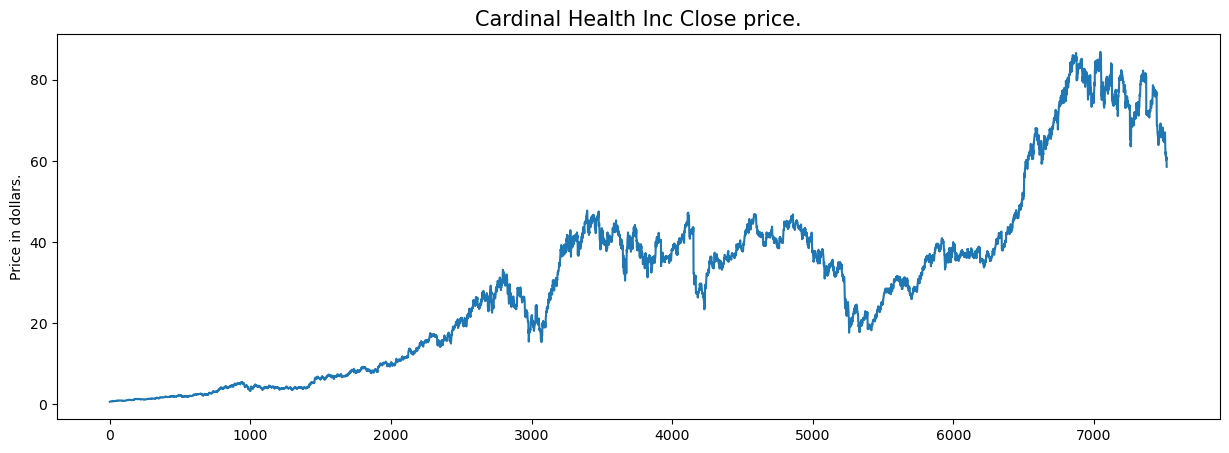

In [7]:
plt.figure(figsize=(15,5)) 
plt.plot(df_cah['Close']) 
plt.title('Cardinal Health Inc Close price.', fontsize=15) 
plt.ylabel('Price in dollars.') 
plt.show()

Machine Learning proves immensely helpful in many industries in automating tasks that earlier required human labor one such application of ML is predicting whether a particular trade will be profitable or not.

In [8]:

df_cah.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In the distribution plot of OHLC data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed


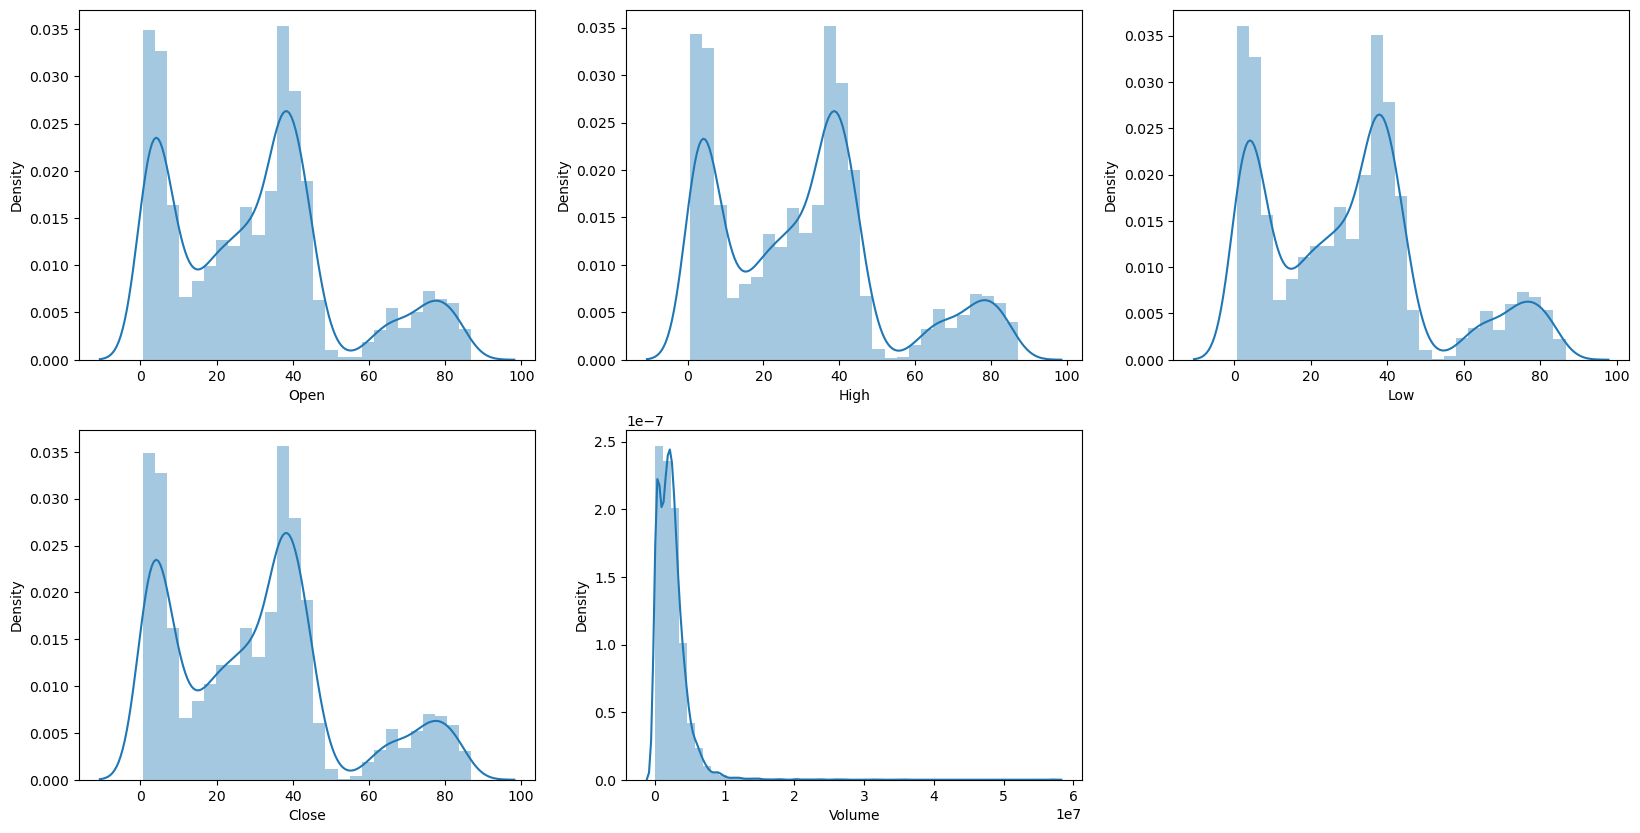

In [9]:

features = ['Open', 'High', 'Low', 'Close', 'Volume'] 
  
plt.subplots(figsize=(20,10)) 
  
for i, col in enumerate(features): 
  plt.subplot(2,3,i+1) 
  sb.distplot(df_cah[col]) 
plt.show()

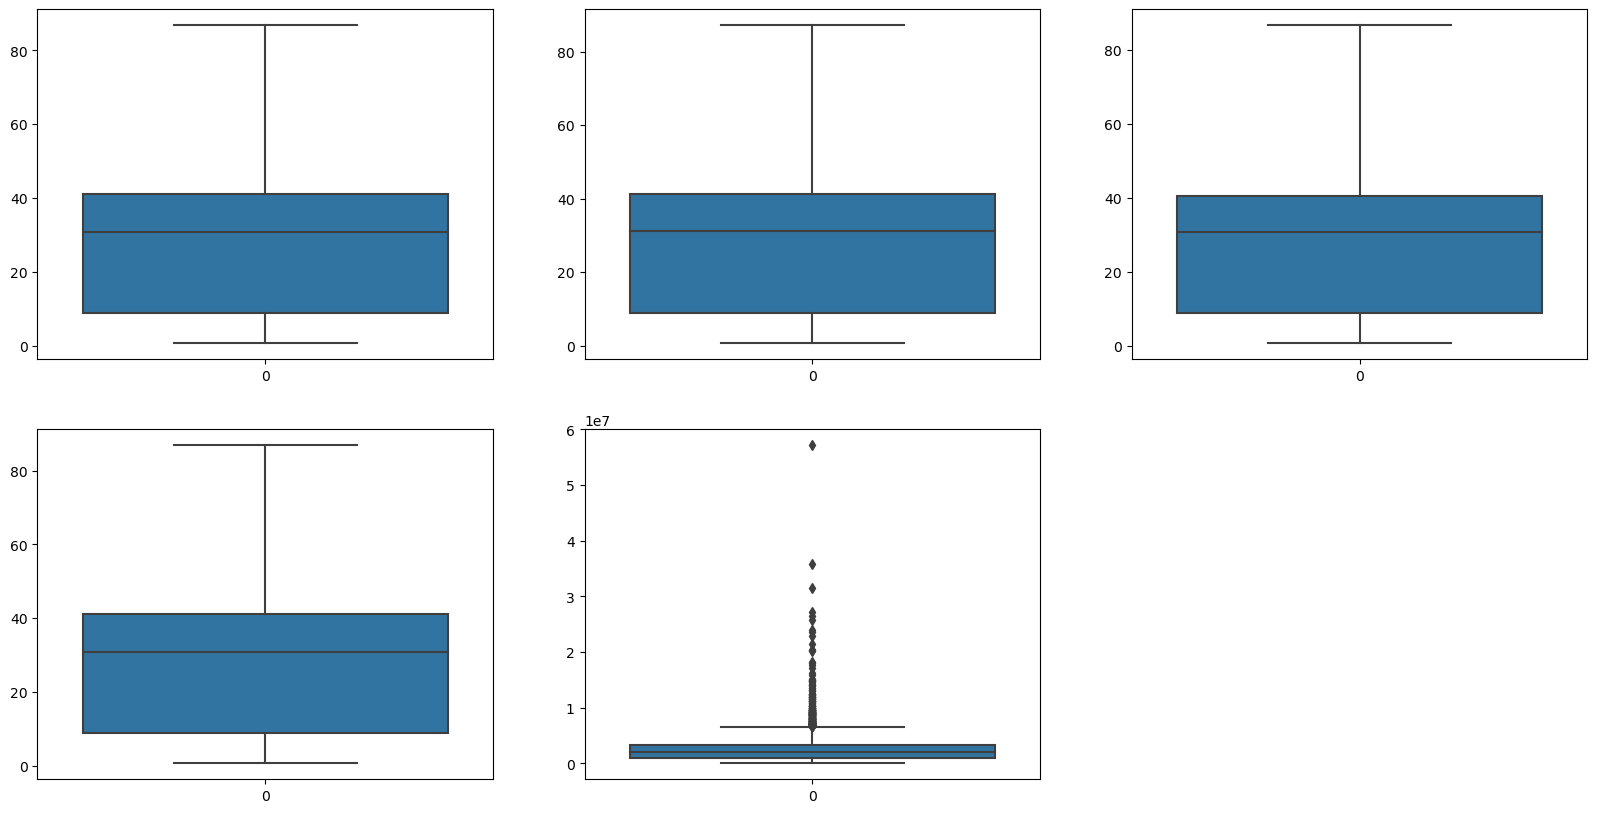

In [21]:
features = ['Open', 'High', 'Low', 'Close', 'Volume'] 
plt.subplots(figsize=(20,10)) 
for i, col in enumerate(features): 
  plt.subplot(2,3,i+1) 
  sb.boxplot(df_cah[col]) 
plt.show()

In [11]:
splitted = df_cah['Date'].str.split('-', expand=True) 
  
df_cah['day'] = splitted[2].astype('int') 
df_cah['month'] = splitted[1].astype('int') 
df_cah['year'] = splitted[0].astype('int') 
  
df_cah.head()

,Date,Open,High,Low,Close,Volume,OpenInt,day,month,year
0,1988-01-04,0.6326,0.6326,0.6326,0.6326,40783,0,4,1,1988
1,1988-01-05,0.6500,0.6500,0.6500,0.6500,177705,0,5,1,1988
2,1988-01-06,0.6500,0.6758,0.6326,0.6758,110703,0,6,1,1988
3,1988-01-07,0.6758,0.6931,0.6584,0.6931,91766,0,7,1,1988
4,1988-01-08,0.7105,0.7366,0.7105,0.7105,152938,0,8,1,1988


In [12]:

df_cah['is_quarter_end'] = np.where(df_cah['month']%3==0,1,0) 
df_cah.head()

,Date,Open,High,Low,Close,Volume,OpenInt,day,month,year,is_quarter_end
0,1988-01-04,0.6326,0.6326,0.6326,0.6326,40783,0,4,1,1988,0
1,1988-01-05,0.6500,0.6500,0.6500,0.6500,177705,0,5,1,1988,0
2,1988-01-06,0.6500,0.6758,0.6326,0.6758,110703,0,6,1,1988,0
3,1988-01-07,0.6758,0.6931,0.6584,0.6931,91766,0,7,1,1988,0
4,1988-01-08,0.7105,0.7366,0.7105,0.7105,152938,0,8,1,1988,0


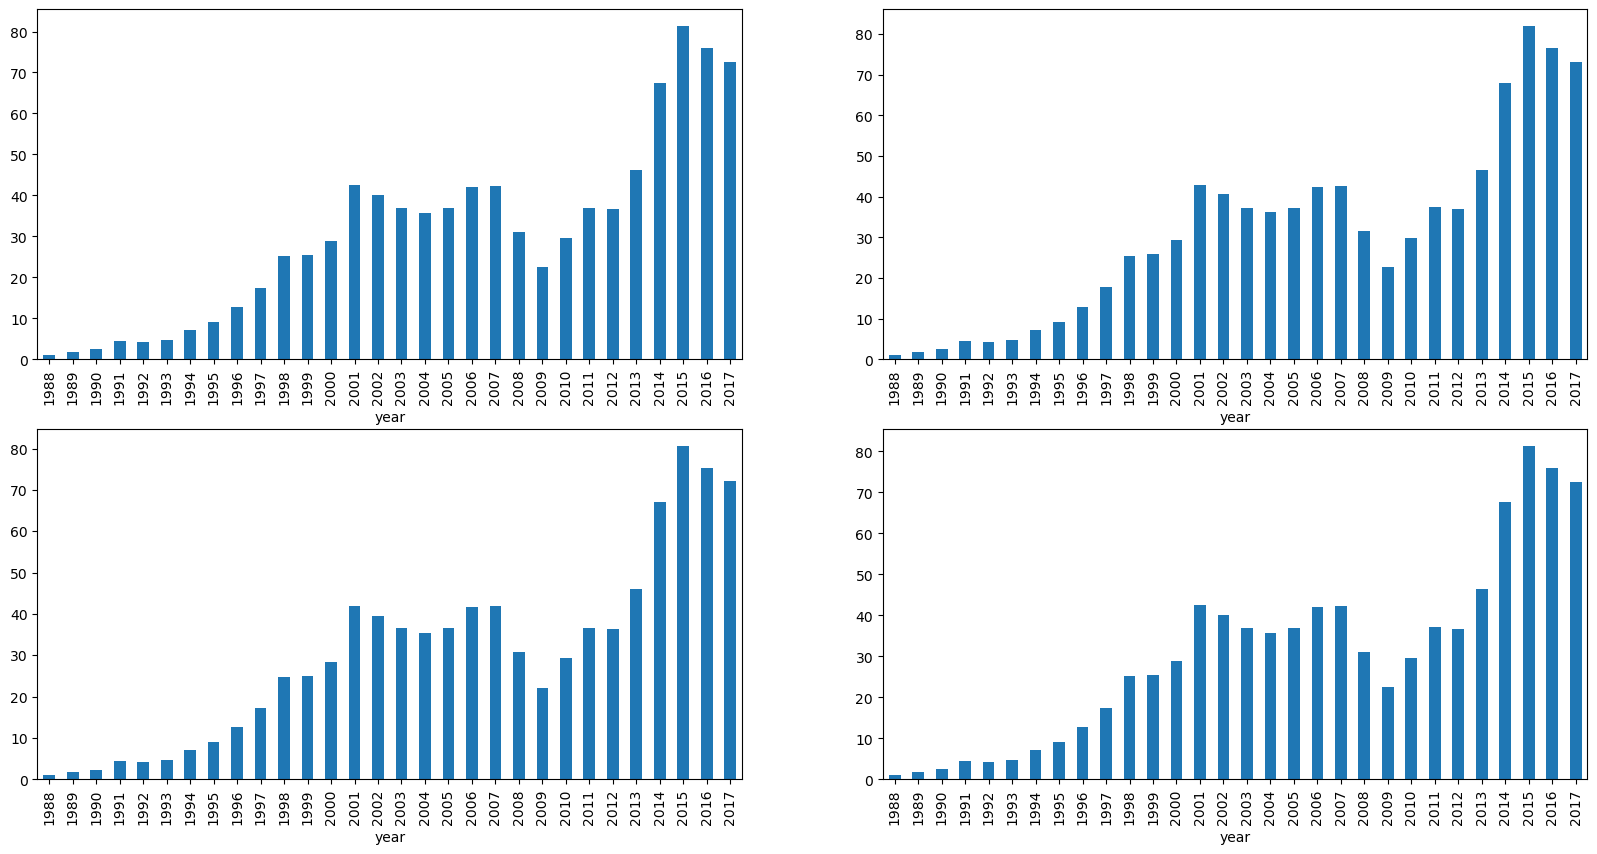

In [13]:
data_grouped = df_cah.groupby('year').mean() 
plt.subplots(figsize=(20,10)) 
  
for i, col in enumerate(['Open', 'High', 'Low', 'Close']): 
  plt.subplot(2,2,i+1) 
  data_grouped[col].plot.bar() 
plt.show()

In [14]:
df_cah.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,OpenInt,day,month,year
is_quarter_end,,,,,,,,,
0,30.403223,30.721199,30.081237,30.419371,2.447308e+06,0.0,15.707200,6.068800,2002.443000
1,30.705389,31.000867,30.408404,30.706306,2.332335e+06,0.0,15.770544,7.395792,2002.410083


In [15]:
df_cah['open-close']  = df_cah['Open'] - df_cah['Close'] 
df_cah['low-high']  = df_cah['Low'] - df_cah['High'] 
df_cah['target'] = np.where(df_cah['Close'].shift(-1) > df_cah['Close'], 1, 0)

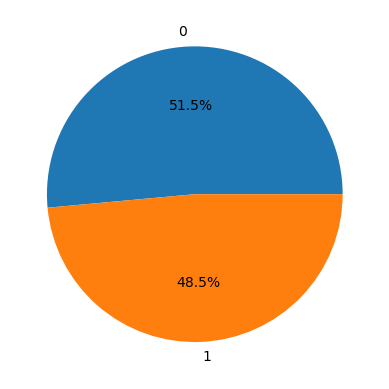

In [16]:
plt.pie(df_cah['target'].value_counts().values,  
        labels=[0, 1], autopct='%1.1f%%') 
plt.show()

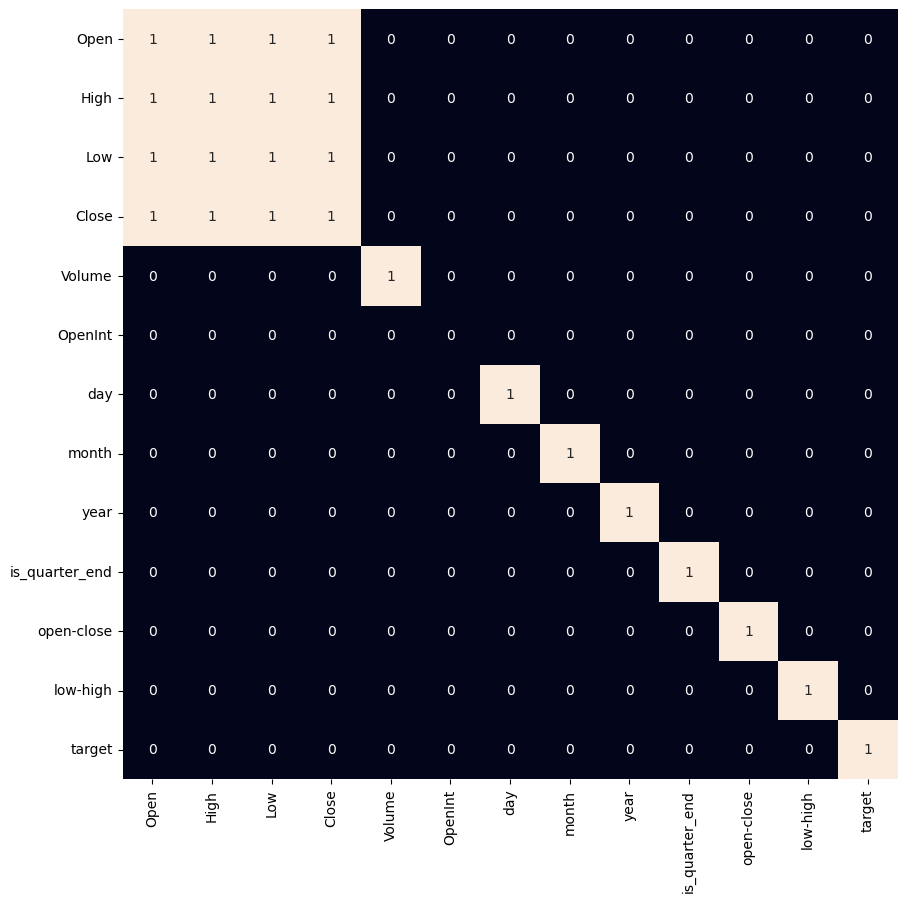

In [17]:
plt.figure(figsize=(10, 10)) 
  
# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sb.heatmap(df_cah.corr() > 0.9, annot=True, cbar=False) 
plt.show() 

In [18]:
features = df_cah[['open-close', 'low-high', 'is_quarter_end']] 
target = df_cah['target'] 
  
scaler = StandardScaler() 
features = scaler.fit_transform(features) 
  
X_train, X_valid, Y_train, Y_valid = train_test_split( 
    features, target, test_size=0.1, random_state=2022) 
print(X_train.shape, X_valid.shape) 

(6767, 3) (752, 3)


In [19]:
models = [LogisticRegression(), SVC( 
  kernel='poly', probability=True), XGBClassifier()] 
  
for i in range(3): 
  models[i].fit(X_train, Y_train) 
  
  print(f'{models[i]} : ') 
  print('Training Accuracy : ', metrics.roc_auc_score( 
    Y_train, models[i].predict_proba(X_train)[:,1])) 
  print('Validation Accuracy : ', metrics.roc_auc_score( 
    Y_valid, models[i].predict_proba(X_valid)[:,1])) 
  print()

LogisticRegression() : 
Training Accuracy :  0.5375937121409246
Validation Accuracy :  0.531669390382806

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.540506456502458
Validation Accuracy :  0.5482133129585217

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Ac